# **CARGA DE TRAIN Y TEST**

In [9]:
import numpy as np
import pandas as pd

In [10]:
x_train=pd.read_excel('06-x_train-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('06-x_test-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('06-y_train-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('06-y_test-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)

In [11]:
x_train

,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,spectralFlux_sma3,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,...,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2bandwidth_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3bandwidth_sma3nz,F3amplitudeLogRelF0_sma3nz
90,0.686283,-13.365475,21.805387,0.117362,-0.021745,0.322117,29.065540,-9.949350,4.122379,-19.894485,...,18.396330,504.795868,1264.451050,-11.238270,1474.455933,905.831726,-22.195908,2472.879883,701.091248,-27.536795
531,0.133466,-14.529531,22.736057,0.112346,-0.023369,0.032919,18.559624,10.611594,4.591365,-19.379351,...,19.466185,589.415955,1160.766357,-61.190533,1689.937988,812.833435,-72.793419,2699.937988,869.368103,-76.697639
492,0.183029,-13.627054,22.315231,0.124793,-0.027166,0.045454,23.496080,10.312009,3.196333,-7.855220,...,22.666872,625.758667,1158.075317,-37.016109,1695.405518,800.553040,-50.555527,2700.184814,785.643494,-55.593662
200,0.523292,-10.153658,22.308111,0.144648,-0.011178,0.282330,27.493036,-11.956691,-4.424508,-13.302747,...,17.931633,652.066223,1089.980835,-5.874428,1658.170044,807.325623,-15.494067,2639.942871,858.077698,-22.693600
402,2.682242,12.360218,12.542377,0.056838,0.007022,1.791305,-14.205788,-36.585232,-26.608820,-18.001987,...,15.256498,994.205811,910.718018,7.747478,2060.611328,854.444702,2.405577,3003.860840,842.517822,2.130888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.283596,-13.299419,25.118744,0.044590,-0.014351,0.099824,35.764061,-1.885084,16.389793,-2.305246,...,23.867781,538.415894,1340.674194,-3.173047,1518.291382,1065.604126,-14.805732,2579.634033,810.602112,-22.540342
9,0.093795,-11.796680,20.428913,0.037718,-0.018227,0.017418,26.071024,7.912013,15.630949,-2.663414,...,11.617766,601.591003,1185.978882,-94.244774,1640.789185,834.311829,-101.348862,2609.575928,870.959167,-104.110413
359,0.446532,-12.687489,20.756443,0.060692,-0.019685,0.167253,23.574137,9.460127,8.270959,-5.526428,...,16.390491,498.381622,1125.148682,-29.589844,1494.545288,802.199646,-40.953072,2501.636230,619.473389,-44.815826
192,0.286837,-11.549992,18.774134,0.085880,-0.021647,0.091296,28.928902,-1.466480,7.663468,-3.639192,...,15.776812,423.518951,1167.467285,-26.100771,1417.748047,833.290955,-35.354836,2365.710693,752.638855,-39.228447


# **NORMALIZACION DE CARACTERISTICAS**

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_train)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [13]:
x_train_std

array([[ 0.0703118 , -0.66880798,  0.40607192, ..., -1.18126693,
        -0.60868486,  0.22867699],
       [-0.85783443, -0.89335889,  0.59077473, ...,  0.13238371,
         0.68338356, -1.92285126],
       [-0.77462166, -0.71926769,  0.50725667, ...,  0.13381173,
         0.04052675, -0.99923403],
       ...,
       [-0.33221569, -0.53802181,  0.19789605, ..., -1.01489632,
        -1.23536556, -0.5275412 ],
       [-0.60033417, -0.31859421, -0.1955175 , ..., -1.80129709,
        -0.21289047, -0.2830091 ],
       [ 0.93470275,  0.61073517, -1.26307365, ...,  0.62483568,
         0.43870653,  0.93596486]])

# **MODELO DE MARCHINE LEARNING**

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
clf.fit(x_train_std, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [21]:
#para generar 300 un nuevo modelo y guardar el que tiene mayor accuracy
from sklearn import metrics
mayor=0
for i in range(300):
  sc = StandardScaler()

  x_train_std = sc.fit_transform(x_train)
  #para trasnformar los datos de testing
  x_test_std = sc.transform(x_test)
  clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
  clf.fit(x_train_std, y_train) 
  y_predict = clf.predict(x_test_std)
  predicion = metrics.accuracy_score(y_test, y_predict)
  if predicion >mayor:
    mayor= predicion
    modelo = clf
  print(f" prueba :{i} PRECISION ====  {metrics.accuracy_score(y_test, y_predict)} ")
clf= modelo

 prueba :0 PRECISION ====  0.4959349593495935 
 prueba :1 PRECISION ====  0.4878048780487805 
 prueba :2 PRECISION ====  0.4959349593495935 
 prueba :3 PRECISION ====  0.4878048780487805 
 prueba :4 PRECISION ====  0.4796747967479675 
 prueba :5 PRECISION ====  0.4878048780487805 
 prueba :6 PRECISION ====  0.4878048780487805 
 prueba :7 PRECISION ====  0.4878048780487805 
 prueba :8 PRECISION ====  0.4878048780487805 
 prueba :9 PRECISION ====  0.4878048780487805 
 prueba :10 PRECISION ====  0.4796747967479675 
 prueba :11 PRECISION ====  0.4959349593495935 
 prueba :12 PRECISION ====  0.4796747967479675 
 prueba :13 PRECISION ====  0.4959349593495935 
 prueba :14 PRECISION ====  0.4959349593495935 
 prueba :15 PRECISION ====  0.4959349593495935 
 prueba :16 PRECISION ====  0.4878048780487805 
 prueba :17 PRECISION ====  0.4878048780487805 
 prueba :18 PRECISION ====  0.4796747967479675 
 prueba :19 PRECISION ====  0.4878048780487805 
 prueba :20 PRECISION ====  0.4878048780487805 
 p

In [22]:
y_predict = clf.predict(x_test_std)
y_predict

array([1, 3, 1, 0, 2, 2, 0, 3, 3, 3, 3, 1, 1, 1, 0, 0, 3, 0, 0, 1, 0, 0,
       3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 3, 2, 0, 3, 1, 3, 3, 1, 0, 3, 3, 0,
       1, 0, 1, 3, 2, 3, 2, 0, 0, 3, 3, 1, 0, 1, 2, 1, 1, 3, 0, 0, 0, 1,
       1, 1, 3, 3, 1, 3, 2, 0, 1, 2, 3, 3, 2, 1, 0, 0, 3, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 3, 1, 3, 3, 0, 0, 1, 0, 1, 3, 0, 3, 0, 3, 2, 0, 2,
       0, 0, 1, 3, 1, 3, 1, 3, 1, 3, 2, 1, 3])

# **EVALUACION**

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65        39
           1       0.47      0.49      0.48        35
           2       0.23      0.18      0.20        17
           3       0.44      0.50      0.47        32

    accuracy                           0.50       123
   macro avg       0.45      0.45      0.45       123
weighted avg       0.49      0.50      0.49       123



In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.66      0.64      0.65        39
           1       0.47      0.49      0.48        35
           2       0.23      0.18      0.20        17
           3       0.44      0.50      0.47        32

    accuracy                           0.50       123
   macro avg       0.45      0.45      0.45       123
weighted avg       0.49      0.50      0.49       123

Matriz de confusión, sin normalización
[[25 12  0  2]
 [ 9 17  2  7]
 [ 0  3  3 11]
 [ 4  4  8 16]]


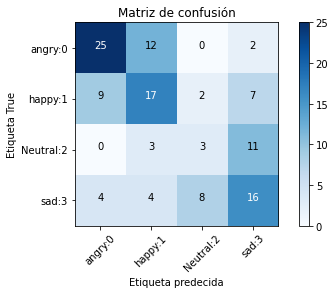

In [25]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')